In [191]:
###########################
# Setup
###########################
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Files
data = "../data/bigtable.csv"

pd.set_option('display.max_columns', None)

In [192]:
##### Set up dataframe
df = pd.read_csv(data)

# Orginal Shape
print(df.shape)
originalshape = df.shape[0]
print(f'Original Shape: {oshape}')
print(f'Columns: {df.columns}')

(105054, 28)
Original Shape: 105054
Columns: Index(['datetime', 'pm25', 'type', 'sensor', 'station_id', 'x', 'y',
       'Population', 'Dist-MRoads', 'Dist-Setl', 'Dist-Coast', 'Dist-Forest',
       'Slope', 'Elevation', 'dayofweek', 'sin_day', 'cos_day', 'sin_year',
       'cos_year', 'date', 'datehour', 'DATE', 'Temperature', 'Wind', 'Dew',
       'Sky', 'Visibility', 'ATM'],
      dtype='object')


In [193]:
# Remove NaN values
df = df.dropna(axis=0, how='any')
endshape = df.shape[0]

# Difference of NaN values
navalues = originalshape - endshape
print(f'Shape before removing NAs:{originalshape}')
print(f'# of NaN values removed: ({navalues})')
print(f'Shape after removing NAs:{endshape}')

Shape before removing NAs:105054
# of NaN values removed: (966)
Shape after removing NAs:104088


In [194]:
# Modify Weather attributes
# Temperature
#df['Temperature'] = df['Temperature'].divide(other=10)

# Wind
data = df['Wind'].str.split(pat=",", expand=True)
df['Wind-Dir'] = data[0].astype('int64')
df['Wind-Rate'] = data[3].astype('float64').divide(other=10)
#df.drop(columns=['Wind'], inplace=True)

# Dew
#df['Dew'] = df['Dew'].divide(other=10)

# Sky
data = df['Sky'].str.split(pat=",", expand=True)
df['Sky'] = data[0]
df['Sky'] = data[0].astype('int64')

# Visibility
data = df['Visibility'].str.split(pat=",", expand=True)
df['Visibility'] = data[0]
df['Visibility'] = data[0].astype('int64')

# ATM
#df['ATM'] = df['ATM'].divide(other=10)

In [195]:
df.head()

,datetime,pm25,type,sensor,station_id,x,y,Population,Dist-MRoads,Dist-Setl,Dist-Coast,Dist-Forest,Slope,Elevation,dayofweek,sin_day,cos_day,sin_year,cos_year,date,datehour,DATE,Temperature,Wind,Dew,Sky,Visibility,ATM,Wind-Dir,Wind-Rate
0,2019-05-08 15:00:00 UTC,52.33,PurpleAir,B,14th & S ST NW B (undefined) (38.913805 -77.0...,38.913805,-77.03275,54.04969,0.072,-1.541,2.792,1.596,1,29,2,-0.707107,-0.707107,0.806480,-0.591261,2019-05-08,2019-05-08-15,2019-05-08T15:00:00,211.1,"050,1,N,0036,1",161.1,99999,16000,10218.1,50,3.6
1,2019-05-08 16:00:00 UTC,0.17,PurpleAir,B,14th & S ST NW B (undefined) (38.913805 -77.0...,38.913805,-77.03275,54.04969,0.072,-1.541,2.792,1.596,1,29,2,-0.866025,-0.500000,0.806480,-0.591261,2019-05-08,2019-05-08-16,2019-05-08T16:52:00,228.5,"030,5,N,0041,5",167.5,762,16093,10213.5,30,4.1
2,2019-05-08 15:00:00 UTC,52.33,PurpleAir,B,14th & S ST NW B (undefined) (38.913805 -77.0...,38.913805,-77.03275,54.04969,0.072,-1.541,2.792,1.596,1,29,2,-0.707107,-0.707107,0.806480,-0.591261,2019-05-08,2019-05-08-15,2019-05-08T15:00:00,211.1,"050,1,N,0036,1",161.1,99999,16000,10218.1,50,3.6
3,2019-05-08 16:00:00 UTC,0.17,PurpleAir,B,14th & S ST NW B (undefined) (38.913805 -77.0...,38.913805,-77.03275,54.04969,0.072,-1.541,2.792,1.596,1,29,2,-0.866025,-0.500000,0.806480,-0.591261,2019-05-08,2019-05-08-16,2019-05-08T16:52:00,228.5,"030,5,N,0041,5",167.5,762,16093,10213.5,30,4.1
25,2019-05-09 14:00:00 UTC,0.33,PurpleAir,B,14th & S ST NW B (undefined) (38.913805 -77.0...,38.913805,-77.03275,54.04969,0.072,-1.541,2.792,1.596,1,29,3,-0.500000,-0.866025,0.796183,-0.605056,2019-05-09,2019-05-09-14,2019-05-09T14:52:00,200.5,"090,5,N,0036,5",167.5,396,16093,10213.5,90,3.6


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104088 entries, 0 to 105053
Data columns (total 30 columns):
datetime       104088 non-null object
pm25           104088 non-null float64
type           104088 non-null object
sensor         104088 non-null object
station_id     104088 non-null object
x              104088 non-null float64
y              104088 non-null float64
Population     104088 non-null float64
Dist-MRoads    104088 non-null float64
Dist-Setl      104088 non-null float64
Dist-Coast     104088 non-null float64
Dist-Forest    104088 non-null float64
Slope          104088 non-null int64
Elevation      104088 non-null int64
dayofweek      104088 non-null int64
sin_day        104088 non-null float64
cos_day        104088 non-null float64
sin_year       104088 non-null float64
cos_year       104088 non-null float64
date           104088 non-null object
datehour       104088 non-null object
DATE           104088 non-null object
Temperature    104088 non-null float64
Wind 

# Understanding the Data Set

In [197]:
df.describe()

,pm25,x,y,Population,Dist-MRoads,Dist-Setl,Dist-Coast,Dist-Forest,Slope,Elevation,dayofweek,sin_day,cos_day,sin_year,cos_year,Temperature,Dew,Sky,Visibility,ATM,Wind-Dir,Wind-Rate
count,104088.000000,104088.000000,104088.000000,104088.000000,104088.000000,104088.000000,104088.000000,104088.000000,104088.000000,104088.000000,104088.000000,1.040880e+05,1.040880e+05,104088.000000,104088.000000,104088.000000,104088.000000,104088.000000,104088.000000,104088.000000,104088.000000,104088.000000
mean,14.086973,38.903891,-77.010881,41.800201,0.171425,-0.662252,3.202368,0.894924,1.629880,34.963127,2.995533,-9.614062e-04,-8.197326e-04,-0.138494,-0.166454,184.146488,106.862497,33010.135097,15804.290322,17464.841795,266.280561,4.412581
std,71.097381,0.015986,0.053306,55.213267,0.153406,0.513780,2.494959,0.582866,1.314855,13.218229,1.999358,7.070359e-01,7.071834e-01,0.732155,0.645810,90.986781,116.747684,38401.940449,18453.520370,24526.934992,254.037756,26.274975
min,0.000000,38.882974,-77.088094,0.000000,0.000000,-1.541000,1.028000,0.000000,0.000000,23.000000,0.000000,-1.000000e+00,-1.000000e+00,-0.999991,-0.999963,-122.500000,-261.500000,61.000000,400.000000,9929.100000,10.000000,0.000000
25%,5.640000,38.882974,-77.037393,0.000000,0.072000,-0.911000,1.408000,0.093000,0.000000,23.000000,1.000000,-7.071068e-01,-7.071068e-01,-0.871706,-0.788305,117.100000,39.100000,4572.000000,16000.000000,10135.100000,130.000000,2.600000
50%,10.330000,38.913805,-77.032750,12.529437,0.118000,-0.650000,2.773000,0.982000,2.000000,32.000000,3.000000,-3.216245e-16,-1.836970e-16,-0.288482,-0.234491,206.100000,128.500000,22000.000000,16093.000000,10181.500000,190.000000,3.600000
75%,17.160000,38.918491,-76.988037,54.049690,0.171000,-0.093000,2.792000,1.250000,2.000000,34.000000,5.000000,7.071068e-01,7.071068e-01,0.587785,0.357698,250.500000,183.500000,22000.000000,16093.000000,10236.500000,320.000000,5.100000
max,4009.480000,38.921850,-76.921768,181.214554,0.464000,0.000000,8.241000,1.596000,4.000000,69.000000,6.000000,1.000000e+00,1.000000e+00,0.999991,1.000000,367.500000,9999.900000,99999.000000,999999.000000,99999.900000,999.000000,999.900000


## Looking at Center, Spread, Shape, and Outliers
Boxplots are a great way to communicate the center, spread, shape, and outliers of a distribution of univariate data. It's often the first visualization to reach for when looking at quantitative data.

In [198]:
# pm2.5
h1 = df.columns[0:2]
h2 = df.columns[5:14]
h3 = df.columns[15:22]
h4 = df.columns[23:28]

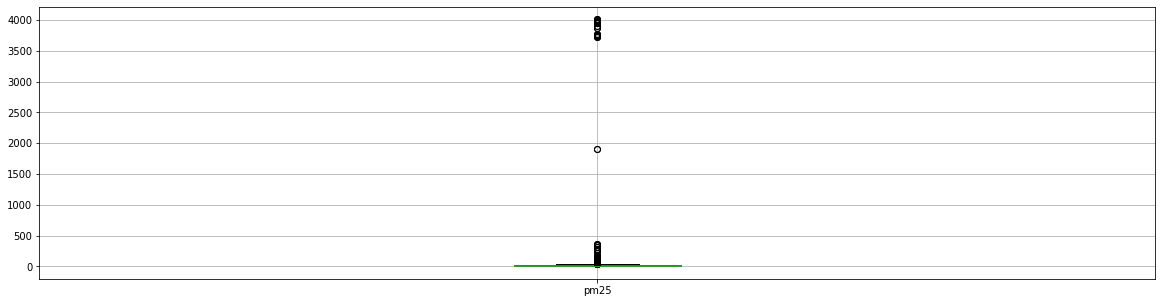

In [202]:
df[h1].boxplot(figsize=(20,5))

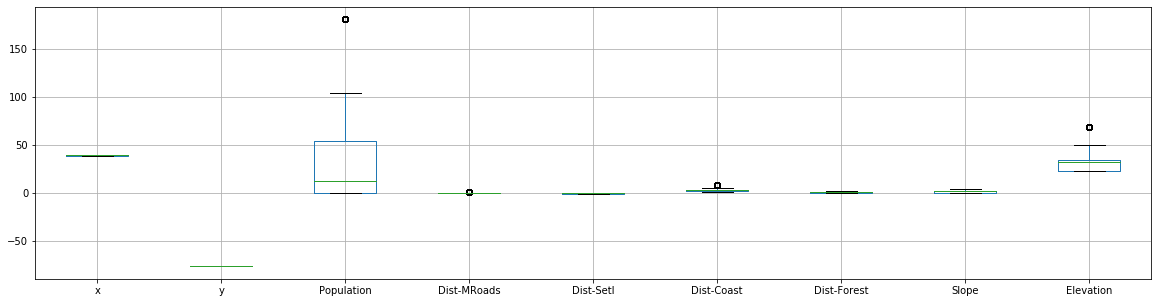

In [203]:
df[h2].boxplot(figsize=(20,5))

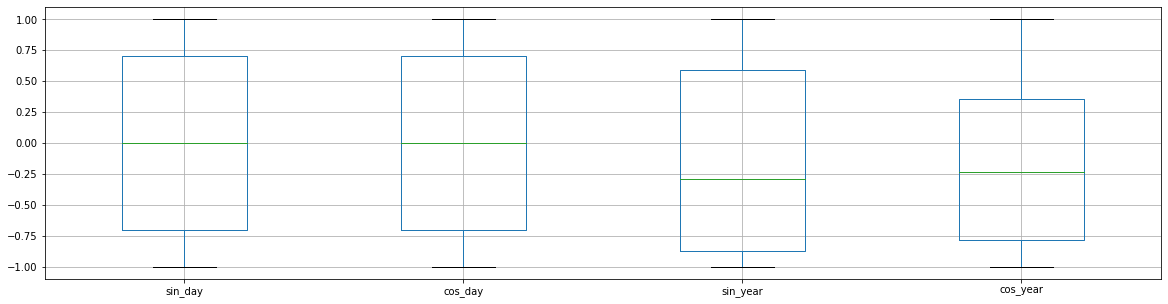

In [204]:
df[h3].boxplot(figsize=(20,5))

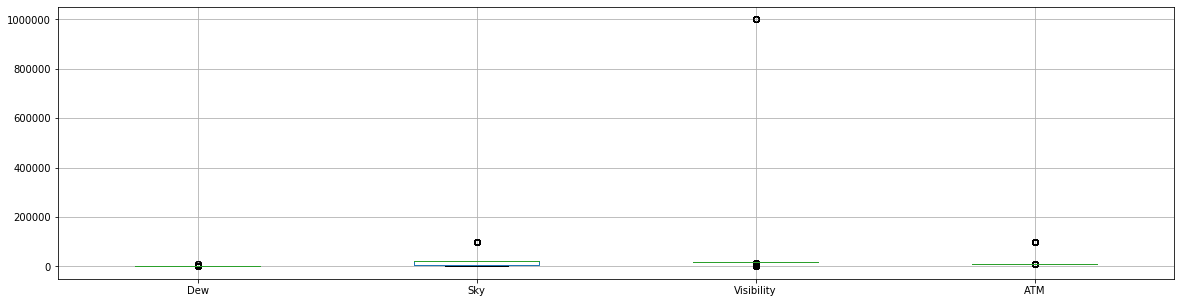

In [205]:
df[h4].boxplot(figsize=(20,5))

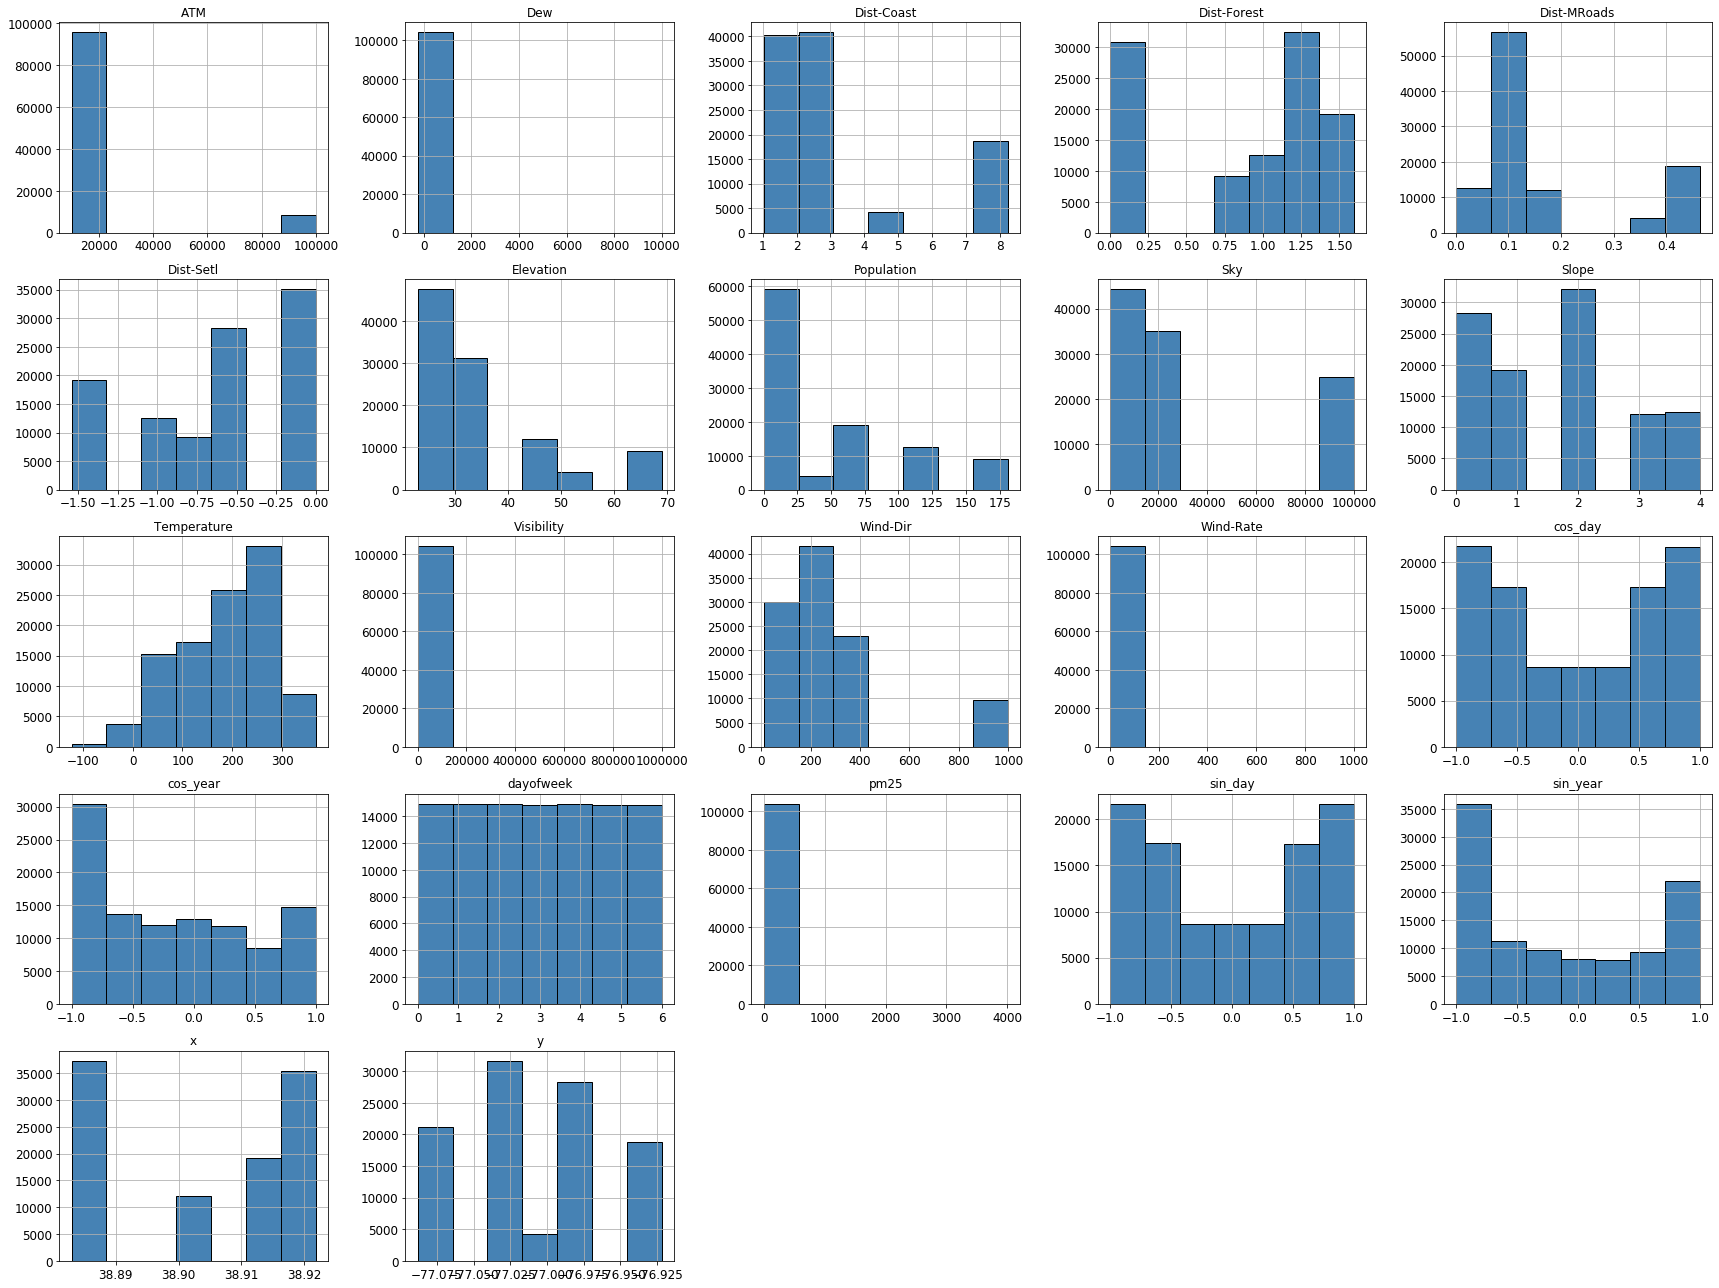

In [206]:
# Historgram of all attributes
df.hist(bins=7, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=12, ylabelsize=12, grid=True, figsize=(20,15))
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

# Cleaning the Dataset for Machine Learning

In [207]:
# Rename station_ids
df = df.replace('13th and E St SE (outside) (38.882974 -76.988037) Primary 60_minute_average 01_01_2019 01_01_2020.csv', '13th and E St SE')
df = df.replace('13th and E St SE B (undefined) (38.882974 -76.988037) Primary 60_minute_average 01_01_2019 01_01_2020.csv', '13th and E St SE B')
df = df.replace('14th & S ST NW  (outside) (38.913805 -77.03275) Primary 60_minute_average 01_01_2019 01_01_2020.csv', '14')
df = df.replace('14th & S ST NW  B (undefined) (38.913805 -77.03275) Primary 60_minute_average 01_01_2019 01_01_2020.csv', '14B')
df = df.replace('arlington (outside) (38.900099 -77.081078) Primary 60_minute_average 01_01_2019 01_01_2020-1.csv', 'Arlington')
df = df.replace('Cheverly (outside) (38.921633 -76.921768) Primary 60_minute_average 01_01_2019 01_01_2020-1.csv', 'Cheverly')
df = df.replace('Cheverly (outside) (38.921633 -76.921768) Primary 60_minute_average 01_01_2019 01_01_2020-9.csv', 'Cheverly')
df = df.replace('Courthouse  (outside) (38.88812 -77.088094) Primary 60_minute_average 01_01_2019 01_01_2020.csv', 'Courthouse')
df = df.replace('McMillan 1 (outside) (38.92185 -77.013271) Primary 60_minute_average 01_01_2019 01_01_2020.csv', 'McMillan')
df = df.replace('V Street (outside) (38.918491 -77.037393) Primary 60_minute_average 01_01_2019 01_01_2020.csv', 'VStreet')
#df = df.replace('[{name=US EPA AirNow, url=http://www.airnow.gov/}, {name=District of Columbia - Department of Energy and Environment, url=null}]', 'EPA DC')
#df = df.replace('[{name=US EPA AirNow, url=http://www.airnow.gov/}, {name=Maryland Department of the Environment, url=null}]', 'EPA Maryland')
#df = df.replace('[{name=US EPA AirNow, url=http://www.airnow.gov/}, {name=Virginia Dept. of Environmental Quality, url=null}]', 'EPA VA')



## Removed weather and pm25 outliers

In [209]:
#dfinal = df.sort_values(by='pm25', ascending=False)
dfinal = df.loc[(df["Temperature"] <= 618) & (df["Wind-Rate"] <= 90) & (df["Wind-Dir"] <= 360) & (df["Sky"] <= 22000) & (df["Dew"] <= 368) & (df["ATM"] <= 10900) & (df["Visibility"] <= 160000) & (df["pm25"] <= 50)]

start = df.shape[0]
final = dfinal.shape[0]

# # Difference of NaN values
removed = start - final
print(f'Shape before removing NAs:{start}')
print(f'# of NaN values removed:{removed}')
print(f'Shape after removing NAs:{final}')

Shape before removing NAs:104088
# of NaN values removed:40426
Shape after removing NAs:63662


In [210]:
dfinal.to_csv('eda.csv', index=False)

# EDA

In [286]:
data = "../model/eda.csv"

df = pd.read_csv(data)

In [287]:
df.shape

(63662, 30)

In [288]:
df.columns

Index(['datetime', 'pm25', 'type', 'sensor', 'station_id', 'x', 'y',
       'Population', 'Dist-MRoads', 'Dist-Setl', 'Dist-Coast', 'Dist-Forest',
       'Slope', 'Elevation', 'dayofweek', 'sin_day', 'cos_day', 'sin_year',
       'cos_year', 'date', 'datehour', 'DATE', 'Temperature', 'Wind', 'Dew',
       'Sky', 'Visibility', 'ATM', 'Wind-Dir', 'Wind-Rate'],
      dtype='object')

In [289]:
df['station_id'].value_counts()

Cheverly              11250
13th and E St SE B     8611
13th and E St SE       8592
VStreet                7697
Arlington              7399
14                     5951
14B                    5943
Courthouse             5631
McMillan               2588
Name: station_id, dtype: int64

In [244]:
#eda = df[["pm25","x","y","Population","Dist-MRoads","Dist-Setl","Dist-Coast","Dist-Forest","Slope","Elevation","dayofweek","sin_day","cos_day","sin_year","cos_year","Temperature","Wind","Dew","Sky","Visibility","ATM"]]

## Univariate Analysis
Univariate analysis is basically the simplest form of data analysis or visualization where we are only concerned with analyzing one data attribute or variable and visualizing the same (one dimension). Basic data distribution of all attributes. The plots above give a good idea about the basic data distribution of any of the attributes.
Let’s drill down to visualizing one of the continuous, numeric attributes. Essentially a histogram or a density plot works quite well in understanding how the data is distributed for that attribute.

In [290]:
df.head()

,datetime,pm25,type,sensor,station_id,x,y,Population,Dist-MRoads,Dist-Setl,Dist-Coast,Dist-Forest,Slope,Elevation,dayofweek,sin_day,cos_day,sin_year,cos_year,date,datehour,DATE,Temperature,Wind,Dew,Sky,Visibility,ATM,Wind-Dir,Wind-Rate
0,2019-05-08 16:00:00 UTC,0.17,PurpleAir,B,14B,38.913805,-77.03275,54.04969,0.072,-1.541,2.792,1.596,1,29,2,-0.866025,-0.500000,0.806480,-0.591261,2019-05-08,2019-05-08-16,2019-05-08T16:52:00,228.5,"030,5,N,0041,5",167.5,762,16093,10213.5,30,4.1
1,2019-05-08 16:00:00 UTC,0.17,PurpleAir,B,14B,38.913805,-77.03275,54.04969,0.072,-1.541,2.792,1.596,1,29,2,-0.866025,-0.500000,0.806480,-0.591261,2019-05-08,2019-05-08-16,2019-05-08T16:52:00,228.5,"030,5,N,0041,5",167.5,762,16093,10213.5,30,4.1
2,2019-05-09 14:00:00 UTC,0.33,PurpleAir,B,14B,38.913805,-77.03275,54.04969,0.072,-1.541,2.792,1.596,1,29,3,-0.500000,-0.866025,0.796183,-0.605056,2019-05-09,2019-05-09-14,2019-05-09T14:52:00,200.5,"090,5,N,0036,5",167.5,396,16093,10213.5,90,3.6
3,2019-05-09 16:00:00 UTC,0.26,PurpleAir,B,14B,38.913805,-77.03275,54.04969,0.072,-1.541,2.792,1.596,1,29,3,-0.866025,-0.500000,0.796183,-0.605056,2019-05-09,2019-05-09-16,2019-05-09T16:52:00,228.5,"130,5,N,0021,5",178.5,610,16093,10210.5,130,2.1
4,2019-05-09 14:00:00 UTC,0.33,PurpleAir,B,14B,38.913805,-77.03275,54.04969,0.072,-1.541,2.792,1.596,1,29,3,-0.500000,-0.866025,0.796183,-0.605056,2019-05-09,2019-05-09-14,2019-05-09T14:52:00,200.5,"090,5,N,0036,5",167.5,396,16093,10213.5,90,3.6


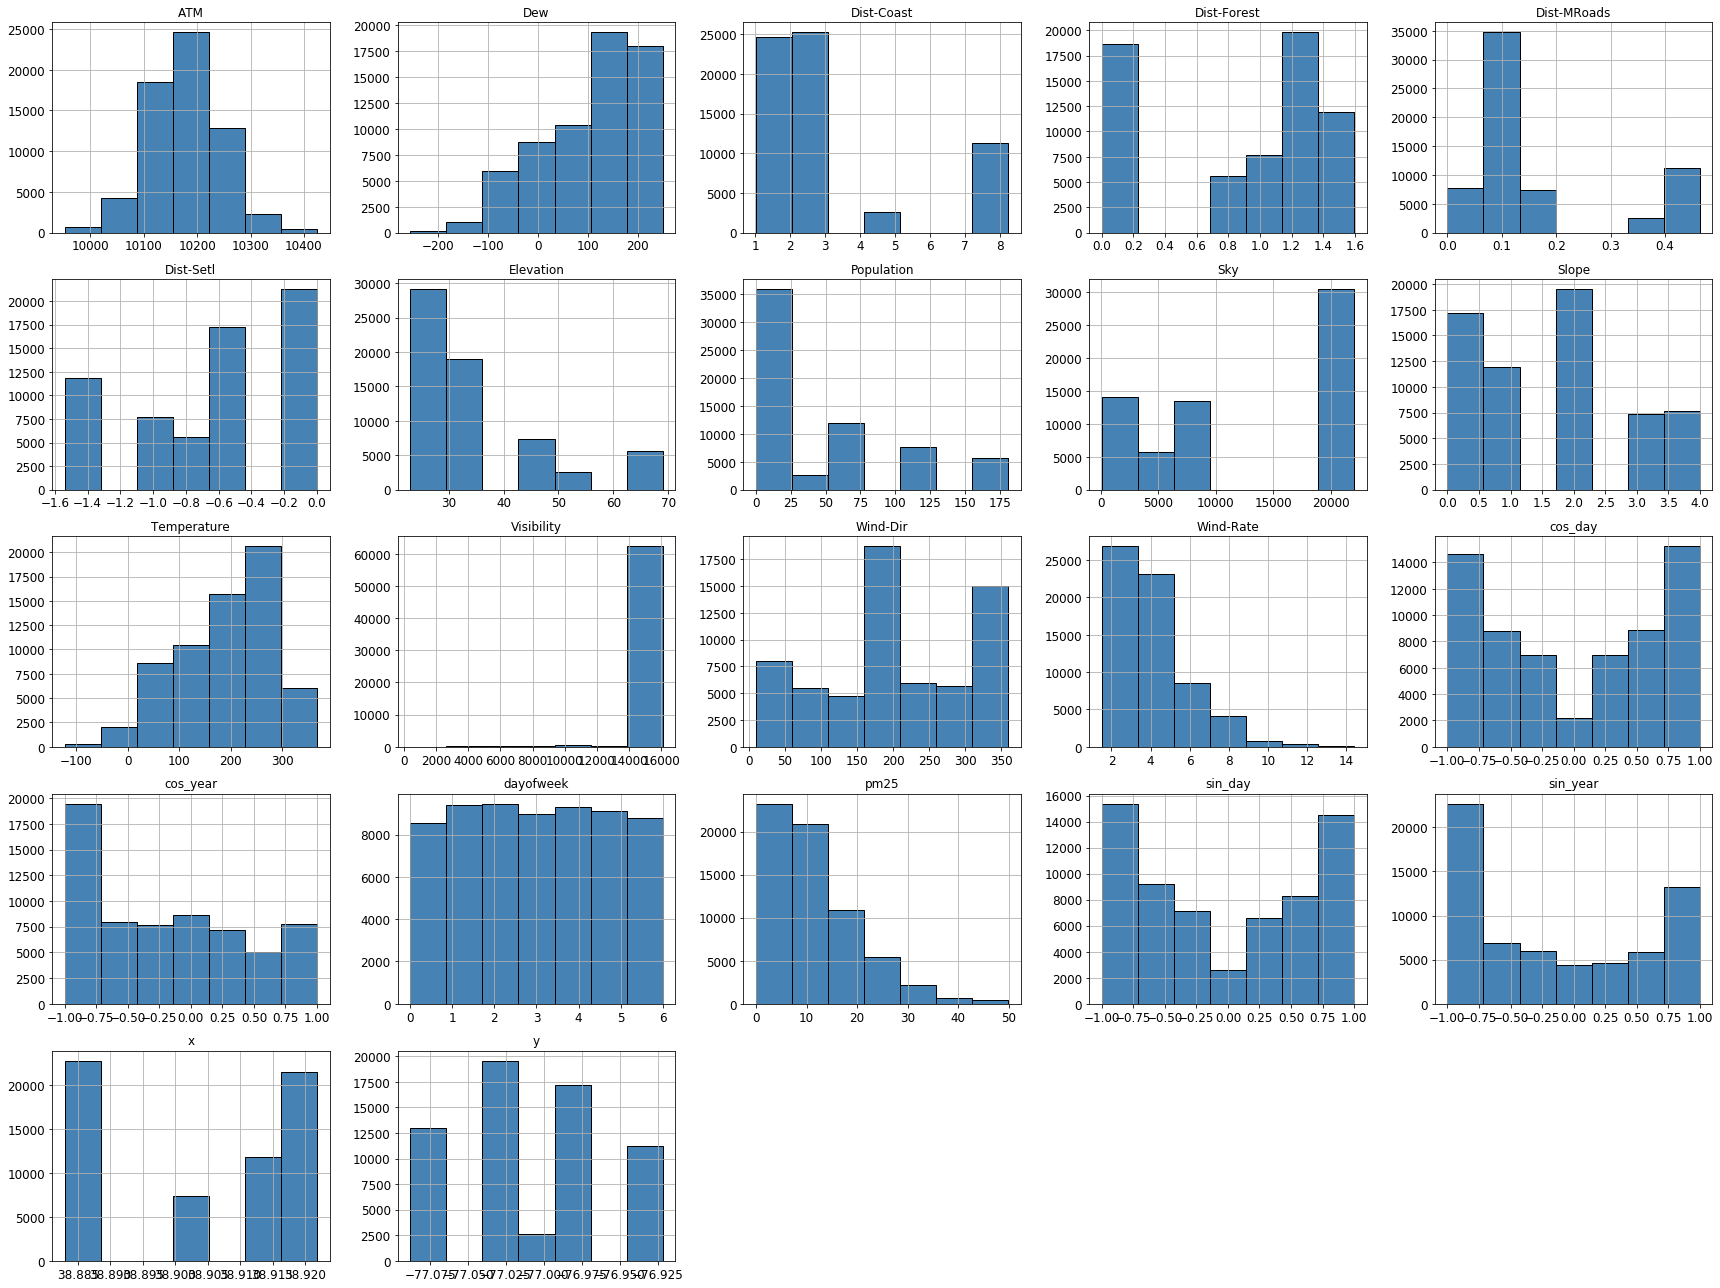

In [291]:
# Historgram of all attributes
df.hist(bins=7, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=12, ylabelsize=12, grid=True, figsize=(20,15))
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

## Multivariate Analysis
Multivariate analysis is where the fun as well as the complexity begins. Here we analyze multiple data dimensions or attributes (2 or more). Multivariate analysis not only involves just checking out distributions but also potential relationships, patterns and correlations amongst these attributes. You can also leverage inferential statistics and hypothesis testing if necessary based on the problem to be solved at hand to check out statistical significance for different attributes, groups and so on.
One of the best ways to check out potential relationships or correlations amongst the different data attributes is to leverage a pair-wise correlation matrix and depict it as a heatmap.

The Pearson correlation coefficient, r, is a number between -1 and 1 that indicates the strength and direction of the linear relationship between two variables.

The gradients in the heatmap vary based on the strength of the correlation and you can clearly see it is very easy to spot potential attributes having strong correlations amongst themselves. Another way to visualize the same is to use pair-wise scatter plots amongst attributes of interest.

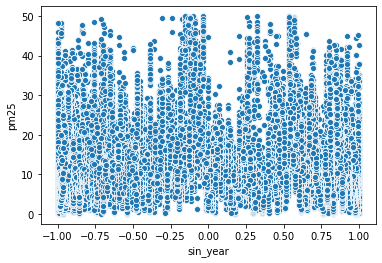

In [311]:
ax = sns.scatterplot(x="sin_year", y="pm25", data=df)

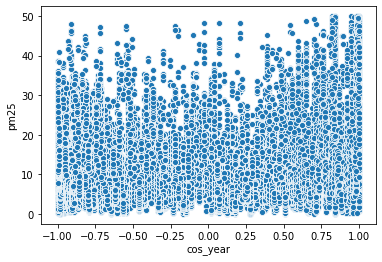

In [296]:
ax = sns.scatterplot(x="cos_year", y="pm25", data=df)

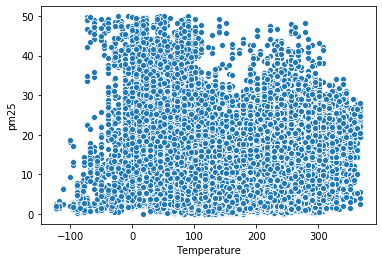

In [297]:
ax = sns.scatterplot(x="Temperature", y="pm25", data=df)

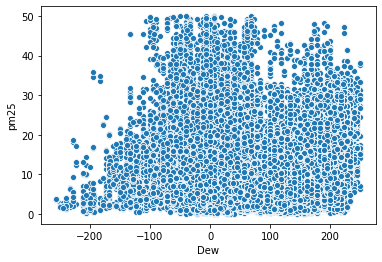

In [298]:
ax = sns.scatterplot(x="Dew", y="pm25", data=df)

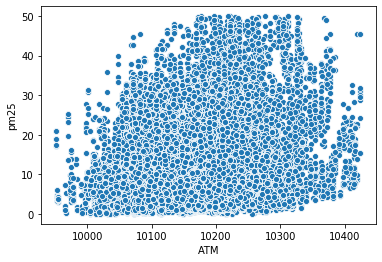

In [299]:
ax = sns.scatterplot(x="ATM", y="pm25", data=df)

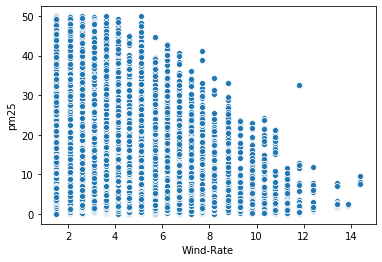

In [301]:
ax = sns.scatterplot(x="Wind-Rate", y="pm25", data=df)

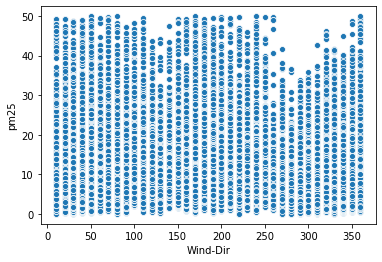

In [304]:
ax = sns.scatterplot(x="Wind-Dir", y="pm25", data=df)

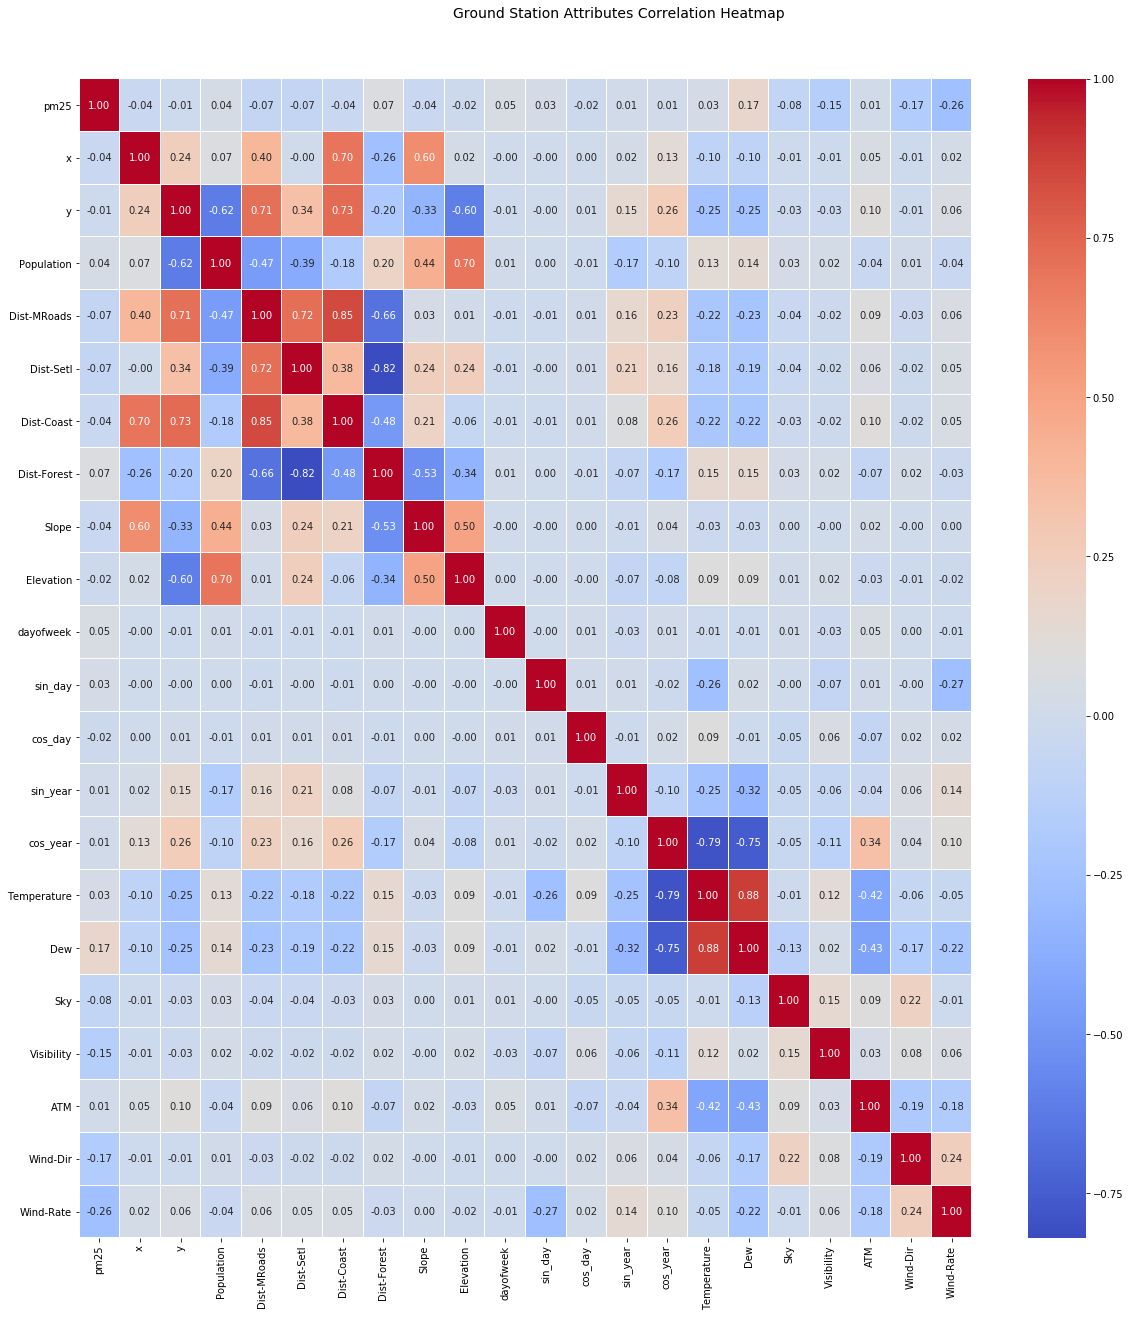

In [312]:
# Pearson Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(20, 20))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Ground Station Attributes Correlation Heatmap', fontsize=14)

In [131]:
# Load
dfinal.to_csv('final.csv', index=False)
